# 5章 モデルの評価と改良

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.dummy import DummyClassifier


from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from mglearn.datasets import make_blobs

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics.scorer import SCORERS


import mglearn

In [2]:
iris = load_iris()

print(iris.data.shape)
iris.target

(150, 4)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
logreg = LogisticRegression()

In [4]:
kfold = KFold(n_splits=5)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [5]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [6]:
kfold = KFold(n_splits=100)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 1. ,
       1. , 1. , 0.5, 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ])

In [7]:
kfold = KFold(n_splits=2)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.28      , 0.33333333])

In [8]:
kfold = KFold(n_splits=4)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 0.63157895, 0.75675676, 0.10810811])

In [9]:
kfold = KFold(n_splits=6)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.  , 1.  , 0.44, 0.48, 0.8 , 0.6 ])

In [10]:
kfold = KFold(n_splits=7)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.81818182, 0.57142857, 1.        ,
       0.80952381, 0.76190476])

In [11]:
kfold = KFold(n_splits=8)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.94736842, 0.63157895, 0.57894737,
       1.        , 0.66666667, 0.94444444])

In [12]:
kfold = KFold(n_splits=9)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 1.        , 0.64705882, 0.58823529,
       0.94117647, 1.        , 0.5625    , 1.        ])

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.9 , 0.96, 0.96])

In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.96666667, 0.9       , 0.96666667, 0.96666667, 0.93333333])

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores

array([0.89333333, 0.96      , 0.94666667, 0.89333333, 0.90666667,
       0.96      , 0.94666667, 0.92      , 0.89333333, 0.86666667])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

X_train.shape, X_test.shape

((112, 4), (38, 4))

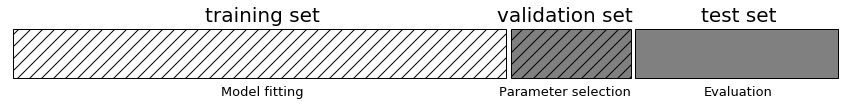

In [17]:
mglearn.plots.plot_threefold_split()

In [18]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print(X_trainval.shape, X_test.shape, X_train.shape, X_valid.shape)

(112, 4) (38, 4) (84, 4) (28, 4)


In [19]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
best_score, best_parameters


(0.9642857142857143, {'C': 10, 'gamma': 0.001})

In [20]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
best_score

0.9642857142857143

In [21]:
print(type(best_parameters))

<class 'dict'>


In [22]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        #svm.fit(X_train, y_train)
        #score = svm.score(X_valid, y_valid)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print(best_score, best_parameters)
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)


0.9726896292113683 {'C': 100, 'gamma': 0.01}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sk

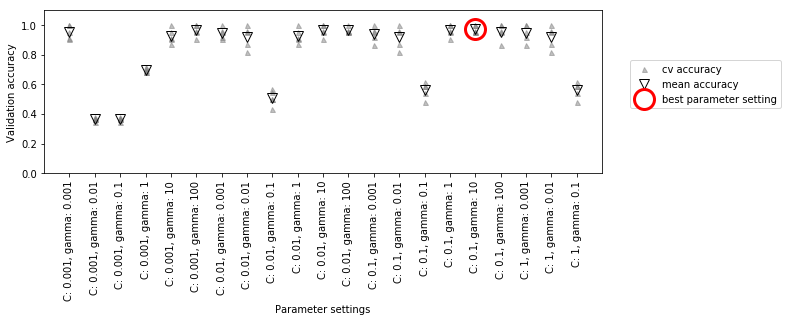

In [23]:
mglearn.plots.plot_cross_val_selection()

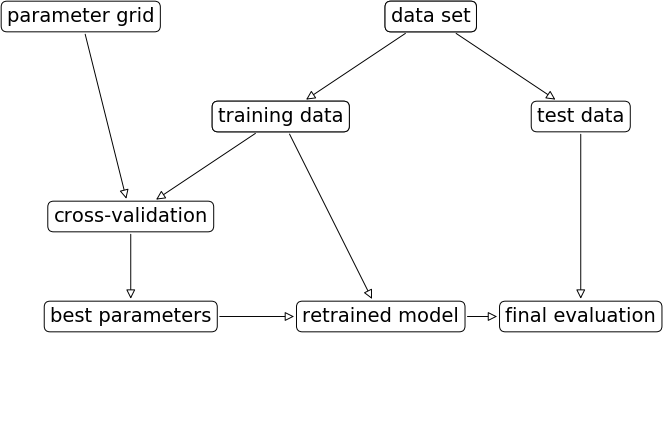

In [24]:
mglearn.plots.plot_grid_search_overview()

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [27]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [28]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
grid_search.best_score_

0.9732142857142857

In [30]:
grid_search.cv_results_

/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sk

{'mean_fit_time': array([0.00085783, 0.00057311, 0.0008275 , 0.00058966, 0.00057974,
        0.0005671 , 0.00052614, 0.00053282, 0.00053525, 0.0005475 ,
        0.00059524, 0.00062146, 0.00052061, 0.00055318, 0.00049496,
        0.00050297, 0.00059595, 0.00063386, 0.00054126, 0.00039515,
        0.00037398, 0.00039988, 0.00071578, 0.00072827, 0.00038586,
        0.00030551, 0.00028663, 0.000388  , 0.000734  , 0.00074406,
        0.0003088 , 0.00026879, 0.00028901, 0.00038104, 0.00089149,
        0.00075631]),
 'mean_score_time': array([0.00024643, 0.00018668, 0.00031085, 0.00018749, 0.00020466,
        0.00019522, 0.00018725, 0.00018477, 0.00018997, 0.00020256,
        0.00019403, 0.00020366, 0.00018644, 0.00019188, 0.00019207,
        0.00018692, 0.00019193, 0.00019855, 0.00019064, 0.00017295,
        0.00017905, 0.00018826, 0.00018206, 0.00019374, 0.00017223,
        0.00015879, 0.00014939, 0.00016127, 0.00018039, 0.00019264,
        0.00015626, 0.00014925, 0.00017657, 0.00015612, 0.

In [31]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/yuki/.local/lib/python3.6/site-packages/sk

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000858,0.000246,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000297,0.000043,0.011371,0.002852
1,0.000573,0.000187,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000076,0.000006,0.011371,0.002852
2,0.000828,0.000311,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000215,0.000107,0.011371,0.002852
3,0.000590,0.000187,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000062,0.000004,0.011371,0.002852
4,0.000580,0.000205,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000041,0.000014,0.011371,0.002852


In [32]:
results.shape

(36, 22)

In [33]:
results.params

0     {'C': 0.001, 'gamma': 0.001}
1      {'C': 0.001, 'gamma': 0.01}
2       {'C': 0.001, 'gamma': 0.1}
3         {'C': 0.001, 'gamma': 1}
4        {'C': 0.001, 'gamma': 10}
5       {'C': 0.001, 'gamma': 100}
6      {'C': 0.01, 'gamma': 0.001}
7       {'C': 0.01, 'gamma': 0.01}
8        {'C': 0.01, 'gamma': 0.1}
9          {'C': 0.01, 'gamma': 1}
10        {'C': 0.01, 'gamma': 10}
11       {'C': 0.01, 'gamma': 100}
12      {'C': 0.1, 'gamma': 0.001}
13       {'C': 0.1, 'gamma': 0.01}
14        {'C': 0.1, 'gamma': 0.1}
15          {'C': 0.1, 'gamma': 1}
16         {'C': 0.1, 'gamma': 10}
17        {'C': 0.1, 'gamma': 100}
18        {'C': 1, 'gamma': 0.001}
19         {'C': 1, 'gamma': 0.01}
20          {'C': 1, 'gamma': 0.1}
21            {'C': 1, 'gamma': 1}
22           {'C': 1, 'gamma': 10}
23          {'C': 1, 'gamma': 100}
24       {'C': 10, 'gamma': 0.001}
25        {'C': 10, 'gamma': 0.01}
26         {'C': 10, 'gamma': 0.1}
27           {'C': 10, 'gamma': 1}
28          {'C': 10

In [34]:
results.split0_test_score

0     0.375000
1     0.375000
2     0.375000
3     0.375000
4     0.375000
5     0.375000
6     0.375000
7     0.375000
8     0.375000
9     0.375000
10    0.375000
11    0.375000
12    0.375000
13    0.708333
14    0.916667
15    1.000000
16    0.375000
17    0.375000
18    0.708333
19    0.875000
20    1.000000
21    0.916667
22    0.875000
23    0.500000
24    0.875000
25    1.000000
26    0.958333
27    0.916667
28    0.875000
29    0.541667
30    1.000000
31    1.000000
32    0.958333
33    0.916667
34    0.875000
35    0.541667
Name: split0_test_score, dtype: float64

In [35]:
scores = np.array(results.mean_test_score).reshape(6, 6)
scores

array([[0.36607143, 0.36607143, 0.36607143, 0.36607143, 0.36607143,
        0.36607143],
       [0.36607143, 0.36607143, 0.36607143, 0.36607143, 0.36607143,
        0.36607143],
       [0.36607143, 0.69642857, 0.91964286, 0.95535714, 0.36607143,
        0.36607143],
       [0.69642857, 0.92857143, 0.96428571, 0.94642857, 0.91964286,
        0.50892857],
       [0.92857143, 0.96428571, 0.96428571, 0.9375    , 0.91964286,
        0.5625    ],
       [0.96428571, 0.97321429, 0.95535714, 0.94642857, 0.91964286,
        0.5625    ]])

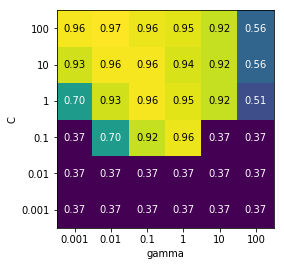

In [36]:
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# 5.2.3.4 ネストした交差検証

In [37]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target,
                        cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [38]:
scores.mean()

0.9800000000000001

# 5.3.2.2 偏ったデータセット

In [39]:
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [40]:
y = digits.target == 9
y

array([False, False, False, ..., False,  True, False])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, 
                                                   random_state=0)
np.bincount(y_train)

array([1214,  133])

In [42]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_majority

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [43]:
pred_most_frequent = dummy_majority.predict(X_test)
print(np.unique(pred_most_frequent))
print(dummy_majority.score(X_test, y_test))

[False]
0.8955555555555555


# 5.3.2.3 混同行列

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [45]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.79
logreg score: 0.98


In [46]:
confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[401,   2],
       [  8,  39]])

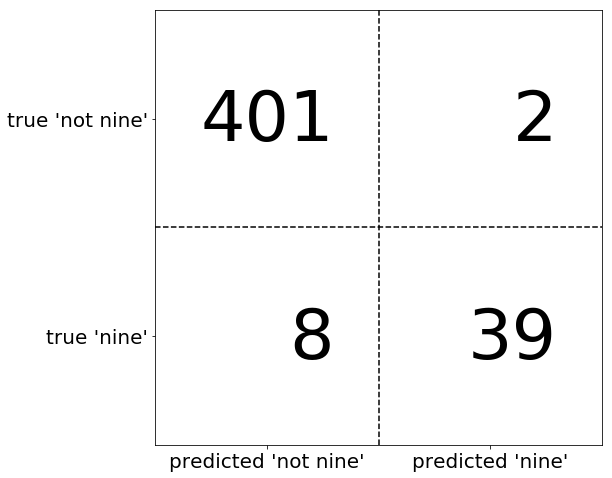

In [47]:
mglearn.plots.plot_confusion_matrix_illustration()

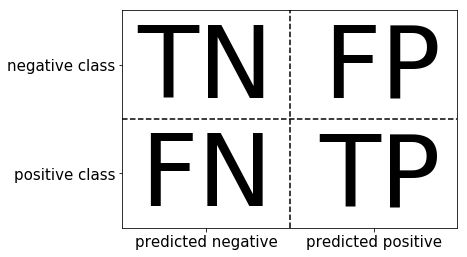

In [48]:
mglearn.plots.plot_binary_confusion_matrix()

In [49]:
confusion_matrix(y_test, pred_most_frequent)

array([[403,   0],
       [ 47,   0]])

In [50]:
confusion_matrix(y_test, pred_dummy)

array([[368,  35],
       [ 41,   6]])

In [51]:
confusion_matrix(y_test, pred_tree)

array([[390,  13],
       [ 24,  23]])

In [52]:
confusion_matrix(y_test, pred_logreg)

array([[401,   2],
       [  8,  39]])

In [53]:
f1_score(y_test, pred_most_frequent)

/home/yuki/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [54]:
f1_score(y_test, pred_dummy)

0.13636363636363635

In [55]:
f1_score(y_test, pred_tree)

0.5542168674698795

In [56]:
f1_score(y_test, pred_logreg)

0.8863636363636364

In [57]:
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/home/yuki/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      0.91      0.91       403
       nine       0.15      0.13      0.14        47

avg / total       0.82      0.83      0.83       450



In [59]:
print(classification_report(y_test, pred_tree, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.94      0.97      0.95       403
       nine       0.64      0.49      0.55        47

avg / total       0.91      0.92      0.91       450



In [60]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



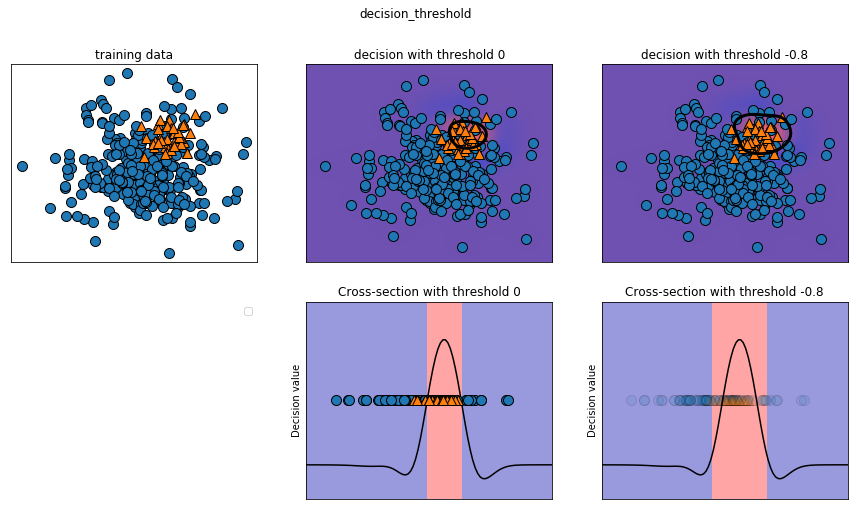

In [61]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
mglearn.plots.plot_decision_threshold()
print(classification_report(y_test, svc.predict(X_test)))

In [62]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
y_pred_lower_threshold

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False])

In [63]:
svc.decision_function(X_test)

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866,
       -1.00097712,  1.07030762, -1.02076344, -0.40435353, -0.48739733,
       -1.00121046, -1.09560781, -1.44572917, -0.99908802, -1.00070245,
       -0.44364565, -1.01170286, -0.99918954, -1.0861769 , -1.33291363,
       -1.00320657, -0.99076097, -1.09564958,  0.63212214, -0.99238394,
       -1.47090403,  0.19153373,  0.74430046, -1.0084656 , -1.15104651,
       -1.02852903, -1.00840776, -1.23180696, -1.0031964 , -1.00023926,
       -1.0013854 , -1.00003771, -1.10114776, -0.98779744, -1.05818617,
       -1.00105363,  0.5230006 ,  0.97789353, -0.99559099,  0.52008479,
       -1.25711078, -1.08267667, -0.99828696, -1.00385465,  0.08620484,
       -0.99871026, -1.06221884, -1.02415268, -1.08797969, -1.06010122,
        0.36988055, -1.05630237, -0.99981001, -0.24173165, -1.02857919,
       -1.00058106, -0.99968788, -1.00115386, -0.99882791,  1.25

In [64]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



In [65]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# 5.3.2.5 適合率-再現率カーブとROCカーブ

In [66]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, 
                                                       svc.decision_function(X_test))

print(thresholds)
print(precision)
print(recall)

[-0.7512563  -0.58749402 -0.48739733 -0.44364565 -0.40435353 -0.28965335
 -0.24173165 -0.19257469 -0.17852475 -0.16644845 -0.1601932   0.08620484
  0.14630375  0.19153373  0.36988055  0.52008479  0.5230006   0.53195462
  0.63212214  0.74430046  0.87212596  0.88002558  0.88395198  0.97789353
  1.00010384  1.07030762  1.08436417  1.25059991]
[0.32142857 0.2962963  0.30769231 0.32       0.33333333 0.34782609
 0.36363636 0.38095238 0.4        0.36842105 0.33333333 0.35294118
 0.375      0.4        0.42857143 0.38461538 0.41666667 0.45454545
 0.4        0.44444444 0.5        0.57142857 0.66666667 0.6
 0.5        0.66666667 0.5        1.         1.        ]
[1.         0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 0.77777778 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.55555556 0.55555556 0.55555556
 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444 0.33333333
 0.22222222 0.22222222 0.11111111 0.11111111 0.        ]


964
(1090,)


Text(0,0.5,'Recall')

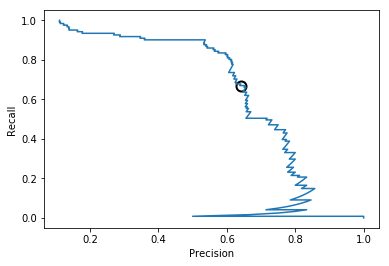

In [67]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, 
                                                      svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
print(close_zero)
print(thresholds.shape)
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="threshold zero", fillstyle="none", c="k", mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [68]:
thresholds

array([-1.42644669, -1.41801331, -1.41416031, ...,  1.44315499,
        1.44543522,  1.4675732 ])

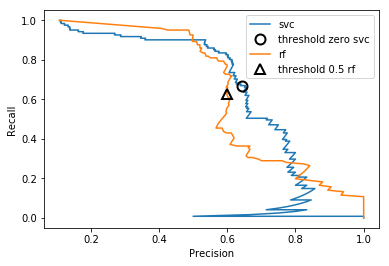

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
        markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [70]:
print(f1_score(y_test, rf.predict(X_test)))
print(f1_score(y_test, svc.predict(X_test)))

0.6097560975609757
0.6558704453441295


In [71]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(ap_rf)
print(ap_svc)


0.659559370099291
0.6663140319391998


# 5.3.2.6 受信者動作特性 （ ROC）と AUC

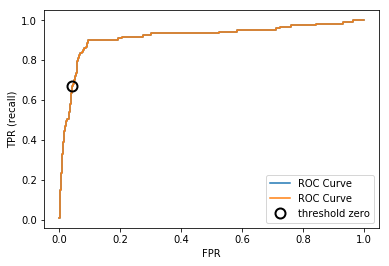

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

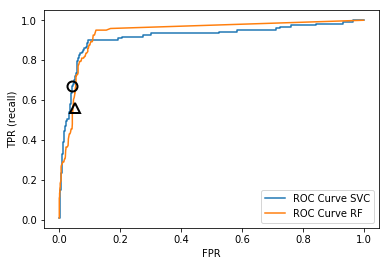

In [73]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.legend(loc=4)

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

In [74]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(rf_auc)
svc_auc

0.9366953672911658


0.9162935036712655

1 0.8955555555555555 0.5
0.05 0.8955555555555555 0.9992080671559052
0.01 0.8955555555555555 0.999524840293543


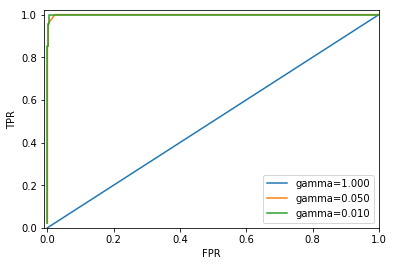

In [75]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(gamma, accuracy, auc)
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

# 5.3.3 多クラス分類の基準
p309

In [82]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

# 行は実際のラベルを、 列が対応する予測ラベルを示す。

0.9533333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


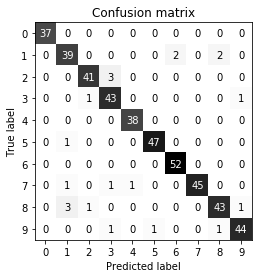

In [83]:
scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels=digits.target_names,
yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [84]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [85]:
print(f1_score(y_test, pred, average="micro"))
print(f1_score(y_test, pred, average="macro"))


0.9533333333333334
0.9539995483362096


# 5.3.5 評価基準を用いたモデル選択
p312

In [88]:
cross_val_score(SVC(), digits.data, digits.target==9)

array([0.89983306, 0.89983306, 0.89983306])

In [89]:
cross_val_score(SVC(), digits.data, digits.target==9, scoring="accuracy")

array([0.89983306, 0.89983306, 0.89983306])

In [90]:
cross_val_score(SVC(), digits.data, digits.target==9, scoring="roc_auc")

array([0.99372294, 0.98957947, 0.99594929])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9,
                                                   random_state=0)
param_grid = {'gamma':[0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(roc_auc_score(y_test, grid.decision_function(X_test)))
print(grid.score(X_test, y_test))

{'gamma': 0.0001}
0.9703043801039347
0.9919222849902327
0.9733333333333334


In [96]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(roc_auc_score(y_test, grid.decision_function(X_test)))
print(grid.score(X_test, y_test))

{'gamma': 0.01}
0.997467845027512
0.999524840293543
0.999524840293543


In [99]:
from sklearn.metrics.scorer import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'median_absolute_error', 'mean_absolute_error', 'mean_squared_error', 'accuracy', 'roc_auc', 'average_precision', 'log_loss', 'neg_log_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [100]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [102]:
SCORERS

{'accuracy': make_scorer(accuracy_score),
 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score),
 'adjusted_rand_score': make_scorer(adjusted_rand_score),
 'average_precision': make_scorer(average_precision_score, needs_threshold=True),
 'completeness_score': make_scorer(completeness_score),
 'explained_variance': make_scorer(explained_variance_score),
 'f1': make_scorer(f1_score),
 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro),
 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro),
 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples),
 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted),
 'fowlkes_mallows_score': make_scorer(fowlkes_mallows_score),
 'homogeneity_score': make_scorer(homogeneity_score),
 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_sq